# Psychoinformatics - Week 10 (Examples)
by 張天瑋

In [1]:
import warnings, numpy as np
import xgboost
from matplotlib.pyplot import *
%matplotlib inline
warnings.simplefilter('ignore', DeprecationWarning)
from sklearn import *

# 1 執行並觀察以下的機器學習結果 (2分)

## 1.0 IRIS dataset & Ensemble model function

In [7]:
iris = datasets.load_iris()
X=iris.data
Y=iris.target

In [3]:
np.random.seed(0)
sss=model_selection.StratifiedShuffleSplit(n_splits=5,test_size=0.1)
def EnsembleModels(model, Max_n_estimators):
    accs=[] # mean cross-validation accuracies of the models w/ different n_estimators from 1..Max_n_estimators
    for n in range(1,Max_n_estimators+1):  
        print(n,end=' ') # showing progress
        model.n_estimators=n
        acc=[] # cross-validation accuracies of the ensemble model w/ n_estimators=n
        for train_index, test_index in sss.split(X, Y): # 5-fold cross-validation of one ensemble model
            X_train, X_test = X[train_index], X[test_index]
            Y_train, Y_test = Y[train_index], Y[test_index]
            model.fit(X_train[:,0:2],Y_train) #training
            acc.append(model.predict(X_test[:,0:2])==Y_test) 
        accs.append(np.mean(acc)) # aggregating mean cross-validation accuracies across all the ensemble models
    return(accs)

## 1.1 Bagging (Bootstrap Aggregating)

### 1.1.1 Tree max_depth = 1

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 

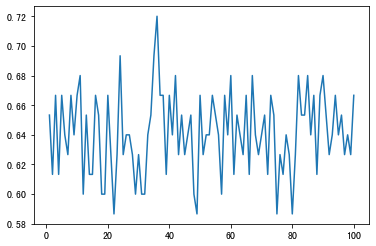

In [4]:
model=ensemble.BaggingClassifier(tree.DecisionTreeClassifier(max_depth=1))
plot(range(1,101),EnsembleModels(model,100));

### 1.1.2 Tree max_depth = 3

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 

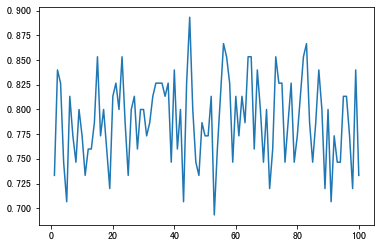

In [5]:
model=ensemble.BaggingClassifier(tree.DecisionTreeClassifier(max_depth=3))
plot(range(1,101),EnsembleModels(model,100));

## 1.2 Boosting

### 1.2.1 AdaBoost

#### 1.2.1.1 Tree max_depth = 1

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 

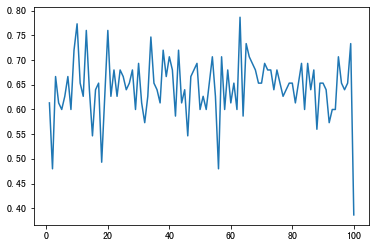

In [8]:
model=ensemble.AdaBoostClassifier(tree.DecisionTreeClassifier(max_depth=1))
plot(range(1,101),EnsembleModels(model,100));

#### 1.2.1.2 Tree max_depth = 3

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 

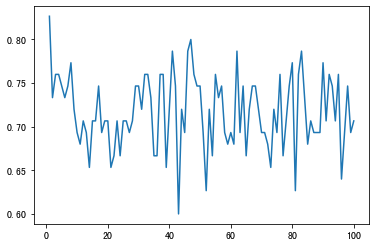

In [9]:
model=ensemble.AdaBoostClassifier(tree.DecisionTreeClassifier(max_depth=3))
plot(range(1,101),EnsembleModels(model,100));

### 1.2.2 Gradient Boosting

The following two implementations are conceptually identical but XGBoost is more resource-efficient and can be parallelized/distributed.

#### 1.2.2.1 Scikit-learn's Gradient Tree Boosting

##### 1.2.2.1.1 Tree max_depth = 1

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 

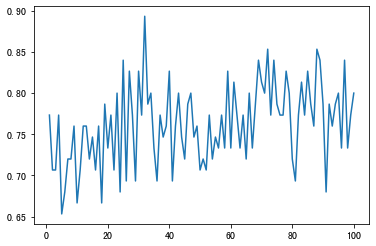

In [10]:
model=ensemble.GradientBoostingClassifier(max_depth=1)
plot(range(1,101),EnsembleModels(model,100));

##### 1.2.2.1.2 Tree max_depth = 3

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 

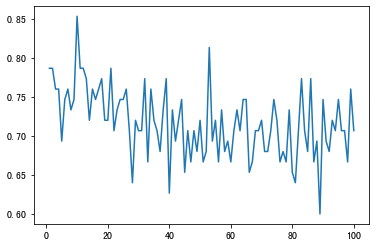

In [11]:
model=ensemble.GradientBoostingClassifier(max_depth=3)
plot(range(1,101),EnsembleModels(model,100));

#### 1.2.2.2 XGBoost (eXtreme Gradient Boosting)

##### 1.2.2.2.1 Tree max_depth = 1

/Users/tianweichang/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 

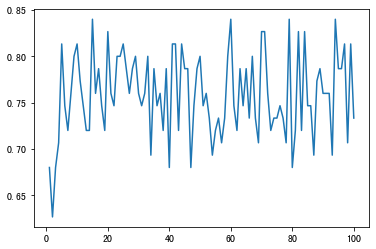

In [12]:
model=xgboost.XGBClassifier(max_depth=1,eval_metric='mlogloss',use_label_encoder=False)
plot(range(1,101),EnsembleModels(model,100));

##### 1.2.2.2.2 Tree max_depth = 3

/Users/tianweichang/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 

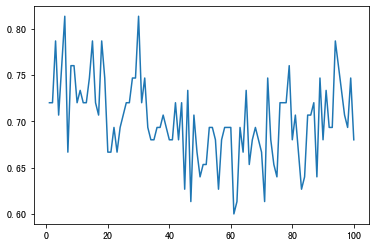

In [13]:
model=xgboost.XGBClassifier(max_depth=3,eval_metric='mlogloss',use_label_encoder=False)
plot(range(1,101),EnsembleModels(model,100));

# 2 根據以上的觀察回答以下的問題 (6 分)

## 2.1 在Bagging時, 1.1.2中複雜模型的正確率是否比1.1.1簡單模型的正確率好或差? 為什麼 (2分)

複雜的模型正確率較高，因為bagging是從訓練資料中隨機抽取樣本訓練多個分類器，每個分類器的權重一致最後用投票方式得到最終結果。模型變深會使每個分類器都進步，因此每個分類器的投票結果也更加精準，最後多數分類器投的那個選項accuracy也會變高。

## 2.2 在Boosting時, 1.2.1.2/1.2.2.1.2/1.2.2.2.2中複雜模型的正確率是否比1.2.1.1/1.2.2.1.1/1.2.2.2.1中相對應的簡單模型正確率好或差? 為什麼 (2分)

AdaBoost：複雜模型表現>簡單模型表現。
因為AdaBoost提高被前幾個分類器分類錯誤樣本的權重，讓每次訓練新的分類器的時後都聚焦在容易分類錯誤的訓練樣本上。可能要更複雜的模型才能精準的預測容易預測錯誤的樣本，所以調高模型複雜度能使AdaBoost能更好預測容易分類錯誤的訓練樣本，使得accuracy提升。

Gradient Boosting、 XGBoost:簡單模型表現>複雜模型表現。
Gradient Boosting在每一次的預測中，都保留了先前的所有學習函數F(x)，並多加入一個新的G(x)，而新的學習函數G(x)是用來預測前一個學習函數F(x)的residual，如此一來F(x)+G(x)可以更好的預測y值。
可能太複雜的模型經過層層的gradient Boosting會導致overfitting的情況，預測結果過度擬和training data。

## 2.3 為何只有Boosting在簡單模型時(1.2.1.1/1.2.2.1.1/1.2.2.2.1)，正確率大致上會隨著n_estimators數目變多而增加，但Bagging和複雜的Boosting模型卻不是如此? (2分)

Boosting在簡單模型中是很多Weak Learner的透過sequential的方式合力完成最後的預測，所以當sequence變長時正確率可以提升。

Bagging是從訓練資料中隨機抽取樣本訓練多個分類器，每個分類器的權重一致最後用投票方式得到最終結果。如果大家的投票準確率沒有提升增加能夠投票的人數不會對於正確率有太大的提升。

Boosting在複雜模型中因為前幾個Strong Learner就已經可以準確預測了，增加sequence的長度反而會造成過度擬和的狀況導致正確率無法提升。